# CORE TASK 1: No spin coupling

Write a program to construct a lattice and evolve it with time according to the Metropolis‐Hastings algorithm. 

It is probably simplest to parameterise your functions in terms of the dimensionless quantities 𝛽𝐽 and 𝛽𝜇𝐻.

The energy of the 2D Ising system is given by 

$𝐸 = -𝐽 \Sigma_i \Sigma_j 𝑠_i 𝑠_j - 𝜇𝐻 \Sigma_{i=1}^N 𝑠_i$

In [42]:
import numpy as np
import random

# Initialise lattice with a w by w grid, where N is the number of spins given by N = w * w
# Here, we initialise with a random spin orientation, where -1 is spin down and 1 is spin up

def initialize_random_lattice(w):
    return np.random.choice([-1, 1], size=(w, w))

def initialise_uniform_lattice(w):
    return np.ones((w, w))

# Calculate the energy of the lattice using the Ising model defined above
# The energy is given by the sum of the interaction between neighbouring spins and the external magnetic field
# Here, lattice[i, j] means the spin at position (i, j)
# We sum over all spins and their neighbours. 
# Going clockwise, (i, j-1) is top neighbour, (i+1, j) is right neighbour, , (i, j+1) is bottom neighbour, (i-1, j) is left neighbour
# We include modulo % to ensure periodic boundary conditions

def calculate_energy(lattice, J, muH):
    energy = 0
    size = lattice.shape[0]
    for i in range(size):
        for j in range(size):
            energy += -J * lattice[i, j] * (lattice[i, (j-1)%size] + lattice[(i+1)%size, j] + lattice[i, (j+1)%size] + lattice[(i-1)%size, j])
            energy += -muH * lattice[i, j]
    return energy

def metropolis_hastings(lattice, J, muH, beta):
    size = lattice.shape[0]
    for i in range(size):
        for j in range(size):
            old_spin = lattice[i, j]
            delta_energy = 2 * J * old_spin * (lattice[i, (j-1)%size] + lattice[(i+1)%size, j] + lattice[i, (j+1)%size] + lattice[(i-1)%size, j]) + 2 * muH * old_spin
            new_spin = -old_spin # spin flipping
            if delta_energy <= 0 or np.random.rand() < np.exp(-delta_energy * beta):
                lattice[i, j] = new_spin
    return lattice

### No Coupling

Set 𝛽𝐽 = 0 so there is no coupling. In such a case, only thermal motion and the external magnetic field affect the flipping of the spins. Do a few simulations with −3 < 𝛽𝜇𝐻 < 3 and observe what happens by plotting the lattice configuration after 1, 10, 100, 1000, 10,000 and (if you have time) 100,000 “time steps” (you can display the lattice configuration using the matplotlib.pyplot.matshow() function). Try both starting with a random lattice and a lattice with all spins in one direction.

In [43]:
# Set β=1
# This implies setting kB​T=1, which is a common choice for unit systems in computational simulations. 
# This choice simplifies the calculations because it effectively sets the temperature scale in your simulation.

beta = 1
J = 0 #beta * J = 0

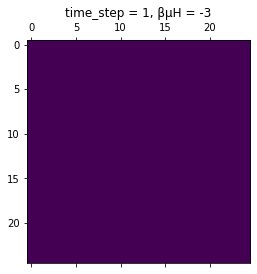

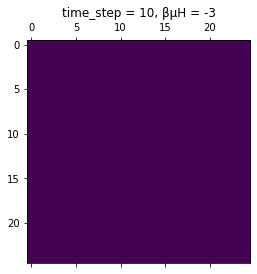

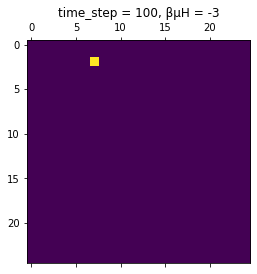

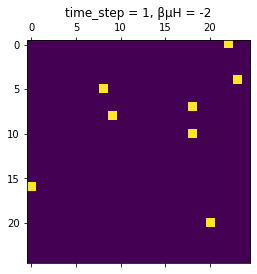

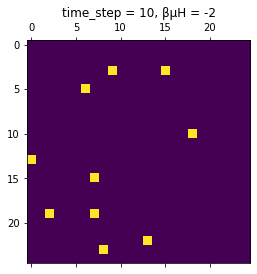

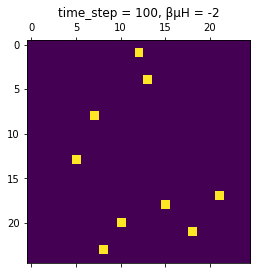

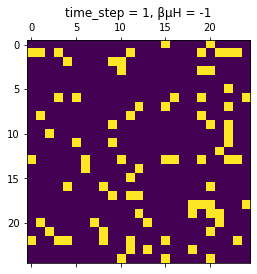

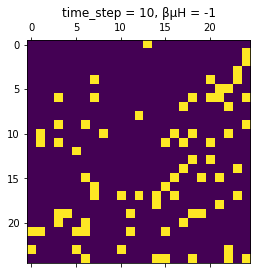

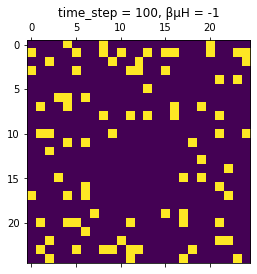

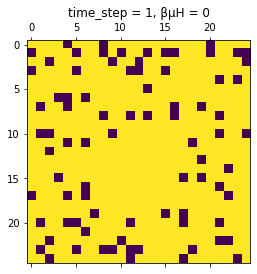

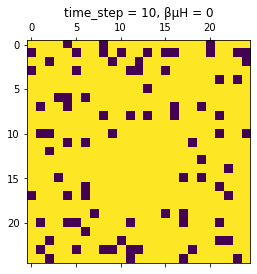

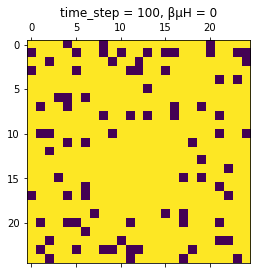

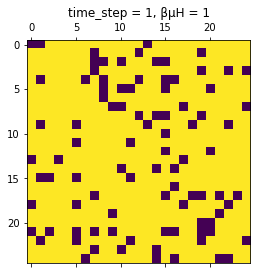

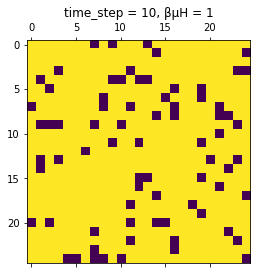

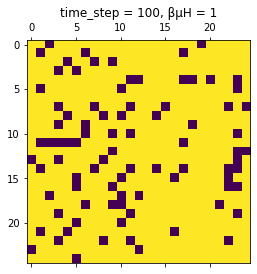

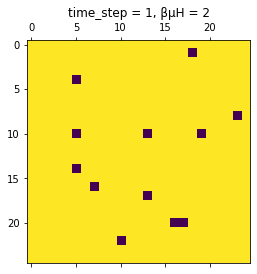

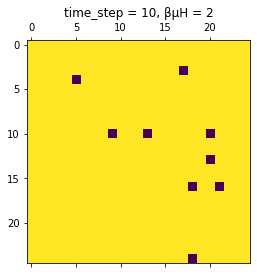

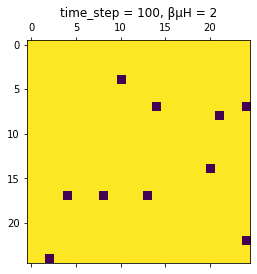

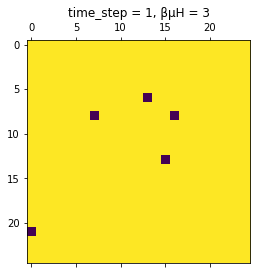

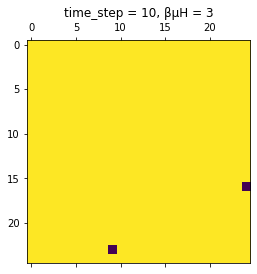

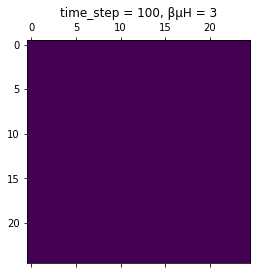

In [47]:
import matplotlib.pyplot as plt

# Set the number of spins and lattice size
w = 25
N = w * w

# Set the number of time steps
# time_steps_value = [1,10,100,1000,10000]
time_steps_value = [1,10,100]

# Perform simulations for different values of 𝛽𝜇𝐻
beta_muH_values = [-3, -2, -1, 0, 1, 2, 3]
# beta_muH_values = [-3]

# Initialize the lattice with random spin orientations or uniform
lattice = initialize_random_lattice(w)
# lattice = initialise_uniform_lattice(w)

# Perform simulations and plot the lattice configuration after 1 time step
for beta_muH in beta_muH_values:
    for time_steps in time_steps_value:
        # Set the external magnetic field
        muH = beta_muH / beta
        
        # Perform the simulation for the specified number of time steps
        for _ in range(time_steps):
            lattice = metropolis_hastings(lattice, J, muH, beta)
        
        # Plot the lattice configuration
        plt.matshow(lattice)
        plt.title(f'time_step = {time_steps}, βμH = {beta_muH}')
        plt.show()
